# Problem Set 7
Name: S Sriniketh Desikan
Roll No.: EP23B051


In [3]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

### Problem 1
How many real roots does the polynomial $f(x) = 2x^3−5$ have? Find the roots using the method of bisection.

$f(x)$ will have one root because it crosses the origin only once. (i.e the derivative becomes zero only at an inflexion point)

In [7]:
def f(x):
  return 2*x**3 - 5 # has one real root since it is cubic and has no other terms
a=float(input("Enter the first guess: "))
b=float(input("Enter the second guess: "))
for i in range(0,1000):
  c=(a+b)/2
  if f(a)*f(c)<0:
    b=c
  elif f(c)*f(b)<0:
    a=c
print(c)

Enter the first guess:  1
Enter the second guess:  2


1.3572088082974534


### Problem 2
Use bisection method to find a root between x=0 and x=4 for $f(x) = e
^xln(x)−cos(x)=0$.

In [10]:
def bisect(f, a, b, N):
    if f(a) * f(b) >= 0:
        return "No root found: f(a) and f(b) must have opposite signs"

    for i in range(N):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        elif f(c) * f(b) < 0:
            a = c
        elif f(c) == 0:
            return c
    return (a + b) / 2

In [12]:
def f(x):
    if x==0:
        x=0.00001
        #Handling the zero case by making it a small value
    return ((np.e**x)*np.log(x)-np.cos(x))
print("The root is",bisect(f,0,4,100))

The root is 1.1419433355206179


### Problem 3
Solve the equation $f(x) = x^3 − 0.165x^2 + 3.993 × 10^{−4}$ using Newton-Raphson method. You may start of by plotting the function.
\
a) With initial guess of x(0)=0.05. \
b) With initial guess of x(0)=0.11,
Why does the 2nd case do not offer any solution? \
c) Can you find another initial guess which will lead to no solution? Explain why. \
d) Now take e = [0.1 0.01 0.001 0.0001 0.00001 0.000001 ...] and plot e vs the number of steps needed
for convergence (N).

In [15]:
def NR(x0,f,f1,ite):
    xr=x0
    for i in range(0,ite):
        if f1(xr)==0:
            xr="No root found. Extremum encountered"
            break
        xr-=f(xr)/f1(xr)
    return xr

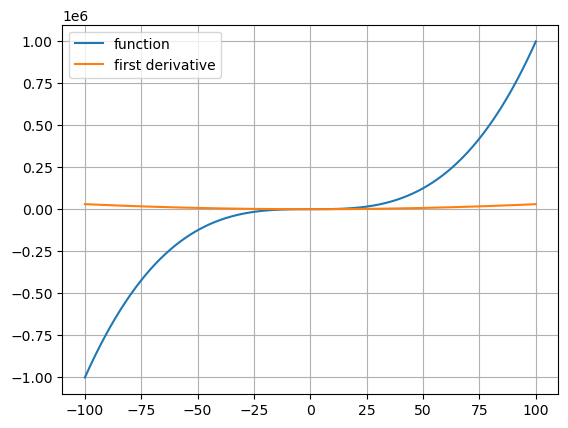

(a) 
 The root is  0.06237758151374951
(b) 
 No root found. Extremum encountered


In [17]:
def f(x):
  return x**3 - 0.165*x**2 + 3.993e-4
def f1(x):
  return 3*x**2 - 0.33*x
x=np.linspace(-100,100,1000)
y=f(x)
y1=f1(x)
plt.plot(x,y,label='function')
plt.plot(x,y1,label='first derivative')
plt.grid()
plt.legend()
plt.show()

print("(a) \n The root is ",NR(0.05,f,f1,1000))

print("(b) \n",NR(0.11,f,f1,1000))

#From the plot, we can see that atleast one root exists

We see that x=0.11 is a point where the derivative is 0. When a point of maxima, minima, inflection or a point where the derivative does not exist arise becomes
a part of the Newton-Raphson sequence, this problem can arise. Hence, the second case does not offer any solution.

(c)
Note that 0 is another point of extrema since the first derivative vanishes. Hence, 0 is another point which will lead to no solution.

In [21]:
print(NR(0,f,f1,1000))

No root found. Extremum encountered


In [23]:
print(NR(0.11,f,f1,1000))

No root found. Extremum encountered


In [25]:
NR(0.05,f,f1,1000)

0.06237758151374951

In [27]:
NR(0.07,f,f1,3)

0.062377581513684395

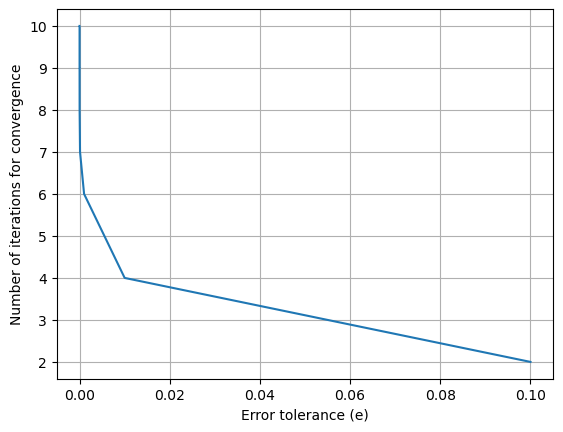

In [45]:
# Newton-Raphson function with error accounting
def NR(x0, f, f1, ite=500, e=0.00001):
    xr = x0
    c = 1
    if abs(f(xr)) < e:
        return xr, c
    else:
        for i in range(ite):
            if f1(xr) == 0:
                return "No root found. Extremum encountered"
            xr_new = xr - f(xr) / f1(xr)
            if abs(f(xr_new)) < e:
                return xr_new, c
            xr = xr_new
            c += 1
    return xr, c

# Function definitions
def f(x):
    return x**3 - 0.165*x**2 + 3.993e-4

def f1(x):
    return 3*x**2 - 0.33*x

# Error array with proper range and scaling
e = 10.0**(-np.arange(1, 10, 1))

# List to store number of iterations
N = []
for i in e:
    m, n = NR(1, f, f1, 500, i)
    N.append(n)

# Plotting error vs number of iterations
plt.plot(e, N)
plt.xlabel('Error tolerance (e)')
plt.ylabel('Number of iterations for convergence')
#plt.xscale('log')  # Use logarithmic scale for error
plt.grid(True)
plt.show()


### Problem 4
Now find the roots for the polynomial of Problem(3) by method of bisection. See if choosing x(0) = 0.11 as
one of the initial bound work. Compare the number of iterations it takes to converge to a root. Also check
x = 1.8 as the starting point.

In [93]:
def f(x):
  return x**3 - 0.165*x**2 + 3.993e-4
def f1(x):
  return 3*x**2 - 0.33*x
print(bisect(f,0.07,0.20,1000))
print(bisect(f,0.11,0.20,1000))

0.1463595046947323
0.1463595046947323


As we see, 0.11 as one of the initial bounds does work.

In [96]:
print(bisect(f,1.8,3,1000))

No root found: f(a) and f(b) must have opposite signs


Therefore, there is no root after 1.8 and before 3

In [119]:
n=1
while bisect(f,0.07,0.20,n+1)-bisect(f,0.07,0.20,n)!=0:
    n+=1
print(n)

50


In [125]:
n=1
while NR(0.07,f,f1,n+1)-NR(0.07,f,f1,n)!=0:
    n+=1
print(n)

5


Here as we see, the convergence happens in 50 iterations as opposed to the Newton-Raphson method where it occurs much faster at 5 iterations.

### Problem 5
Compare the effectiveness of the bisection and Newton–Raphson method’s method for the equation $x^3 −2x − 2 = 0$ which has a single root between x=-4 and x=2.

In [150]:
def p(x):
  return (x**3)-2*x-2
def p1(x):
  return 3*(x**2)-2
print(bisect(p,-4,2,50))
print(NR(1,p,p1,8))

1.7692923542386314
1.7692923542386314


In [146]:
n=1
while bisect(p,-4,2,n+1)-bisect(p,-4,2,n)!=0:
    n+=1
print(n)

49


In [152]:
n=1
while NR(-4,p,p1,n+1)-NR(-4,p,p1,n)!=0:
    n+=1
print(n)

18


Even when we take the farthest point from the root, we see that the Newton-Raphson method is more efficient and converges faster

### Problem 6
Newton-Raphson for finding reciprocal of a number: The reciprocal of a real number a is defined as a zero
of the function: f (x) = 1/x − a. The function converges for an initial estimate in the range 0 < x0 < 2/a.

a) Write a matlab code that will be able to find the reciprocal of any real number using Newton-Raphson
method. Do not set an error limit. Rather let the code run for a fixed number of 50 iterations.

b) Plot the error propagation (by comparing the outcome of the code and 1/a) and plot is as a function of
the iteration

[0.05, 0.095, 0.17195, 0.284766395, 0.407348990557408, 0.48283158089853745, 0.4994104907711131, 0.4999993049577381, 0.49999999999903383, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


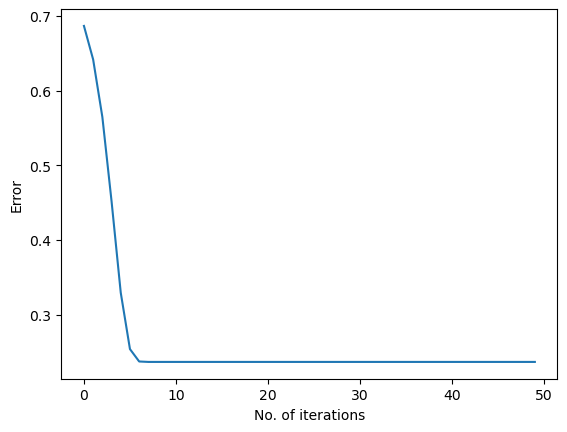

In [164]:
def g(x,a=2):
  return (1/x)-a
def g1(x):
  return -1/x**2
R=[]

for i in range(0,50):
  R.append(NR(0.05,g,g1,i))
print(R)
R=np.array(R)
e=R-1/a
e=abs(e)
N=np.arange(0,len(R))
plt.plot(N,e)
plt.xlabel('No. of iterations')
plt.ylabel('Error')
plt.show()